In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fashion = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[0,20,18]

239

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

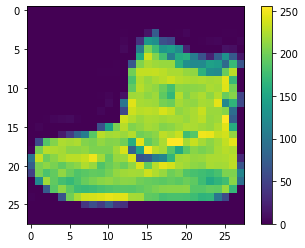

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
m = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [35]:
m.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [36]:
m.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1127 - accuracy: 0.6464
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6471 - accuracy: 0.7691
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5683 - accuracy: 0.7968
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5255 - accuracy: 0.8141
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4969 - accuracy: 0.8250
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4764 - accuracy: 0.8323
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4609 - accuracy: 0.8380
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4487 - accuracy: 0.8422
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4386 - accuracy: 0.8455
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.429

In [37]:
test_loss,test_acc = m.evaluate(test_images,test_labels,verbose=1)
print('Test Accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8351
Test Accuracy 0.835099995136261


In [38]:
predictions = m.predict(test_images)

In [39]:
predictions[0]

array([9.3113147e-07, 1.2665421e-07, 8.7645185e-06, 6.8547711e-06,
       1.2095877e-05, 1.5385841e-01, 1.9451629e-05, 2.4414104e-01,
       4.1206209e-03, 5.9783167e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

T-shirt/top


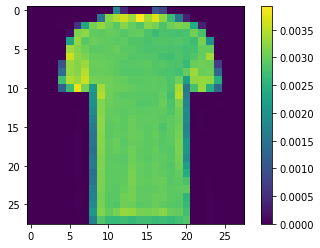

In [41]:
print(class_names[np.argmax(predictions[88])])
plt.figure()
plt.imshow(test_images[88])
plt.colorbar()
plt.show()